To be done:
1. Make some changes such that natural climbing is done
2. Try printing out all paths, along with cost & best path with best cost (Avoided as there s=would be lot for each iteration)
3. Make final plot as interactive so that path can be traced out

In [7]:
# !pip install --upgrade plotly
# !pip install jupyter-dash

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plots
import math
import random

# ACO Algorithm

In [1]:
def get_slope(point1, point2):
  return (point2[1] - point1[1]) / (point2[0] - point1[0])

def distance(point1, point2): # Calculates Euclidean distance for 3D points
  return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)

# Calculating slope with points as 2D points
def find_edge_val(point1, point2, pheromone_val, alpha, beta):
  slope = get_slope(point1, point2)
  dist = distance(point1, point2)

  return (1/slope) + (pheromone_val ** alpha) / (dist ** beta)
'''
X - x values of mountain curve
Y - y values of mountain curve
Z - z values of mountain curve
valid_points - Array of 3D points (Valid points on the mountain)
obstacles - Obstacles which cannot be reached by ants (water, etc.,)
start_index - Starting point index (for valid_points) of mountain
end_index - Destination point index (for obstacles) of mountain
n_ants - No. of ants
n_iterations - No. of iterations
alpha - pheromone importance parameter
beta - distance importance parameter
evaporation_rate - rate at which pheromone evaporates
q - a constant (???)
'''
def ant_colony_optimization(X,Y,Z, valid_points, obstacles, start_index, end_index, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(valid_points) # No. of valid points (on the mountain)
    pheromone = np.ones((n_points, n_points)) # Initializing amount of pheromone on each edge with 1
    best_path = None # Used to book-keep the best path
    best_path_length = np.inf # Used to book-keep the best path length

    for iteration in range(n_iterations): # ACO repeated for 'n_iterations' times
        paths = [] # Current path
        path_lengths = [] # Current path length

        for ant in range(n_ants): # Iterating over all ants
            visited = [False] * n_points # To make sure points are not repeatedly visited
            visited[start_index] = True
            current_point = start_index
            path = [current_point]
            path_length = 0

            while path[-1] != end_index: # Repeat until end index is included in path
                r = round(random.uniform(0, 1), 2) # Extract random float 'r' with 2 decimal places
                chosen_next_point = None
                unvisited_indices = np.where(np.logical_not(visited))[0] # Get index of an unvisited point

                if r==0.01: # Rarest case: Select random edge from available ones
                    chosen_next_point = random.choice(unvisited_indices)

                else: # Select edge with maximum EV
                    chosen_next_point = None
                    max_EV = -math.inf

                    for next_point in unvisited_indices:
                        edge_val = find_edge_val(valid_points[current_point], valid_points[next_point], pheromone[current_point, next_point], alpha, beta)

                        if edge_val > max_EV:
                            max_EV = edge_val
                            chosen_next_point = next_point

                if chosen_next_point:
                    pheromone[current_point, chosen_next_point] += Q / n_points # To promote this edge
                    pheromone[current_point, chosen_next_point] -= 0.5 # To prevent overfitting

                    # Adding this 'chosen_next_point' to path, and updating 'path_length' accordingly
                    path.append(chosen_next_point)
                    path_length += distance(valid_points[current_point], valid_points[chosen_next_point])
                    visited[chosen_next_point] = True
                    current_point = chosen_next_point

            paths.append(path)
            path_lengths.append(path_length)

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # Global updation - Evaporating the pheromones
        pheromone *= evaporation_rate

        # Local updation of pheromones - Done for each ant in it's path
        for path, path_length in zip(paths, path_lengths):
            for i in range(len(path)-1):
                # print('n_points: ', n_points)
                # print('i: ', i)
                # print('Path length: ', path_length)
                # print('len_(path): ', len(path))
                # print('Path: ', path)
                pheromone[path[i], path[i+1]] += Q/path_length # Updation of pheromones

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.25)

    x_pts = [coord[0] for coord in valid_points]
    y_pts = [coord[1] for coord in valid_points]
    z_pts = [coord[2] for coord in valid_points]

    x_obs = [coord[0] for coord in obstacles]
    y_obs = [coord[1] for coord in obstacles]
    z_obs = [coord[2] for coord in obstacles]

    ax.scatter(x_pts, y_pts, z_pts, c='r', marker='o')
    ax.scatter(x_obs, y_obs, z_obs, c='k', marker='o')

    print('Best path: ', best_path)
    print('Path length: ', best_path_length)

    # print('Valid points: ', valid_points)
    # Plotting start point
    ax.scatter(valid_points[best_path[0]][0], valid_points[best_path[0]][1], valid_points[best_path[0]][2], c='g', marker='o', s=100, label='START')
    ax.text(valid_points[best_path[0]][0], valid_points[best_path[0]][1], valid_points[best_path[0]][2], 'START', color='black')

    # Plotting end point
    ax.scatter(valid_points[best_path[-1]][0], valid_points[best_path[-1]][1], valid_points[best_path[-1]][2], c='b', marker='o', s=100, label='END')
    ax.text(valid_points[best_path[-1]][0], valid_points[best_path[-1]][1], valid_points[best_path[-1]][2], 'END', color='black')

    # Set labels for start and end points
    for i in range(len(best_path)-1):
        ax.plot([valid_points[best_path[i]][0], valid_points[best_path[i+1]][0]],
                [valid_points[best_path[i]][1], valid_points[best_path[i+1]][1]],
                [valid_points[best_path[i]][2], valid_points[best_path[i+1]][2]],
                c='g', linestyle='-', linewidth=2, marker='o')

    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')
    ax.set_zlabel('Z Coordinates')
    plt.show()

# Generating proper mountain curve using mathematical equation

NOTE: The curve can be modified by changing the x and y coefficients in mountain_surface() function.

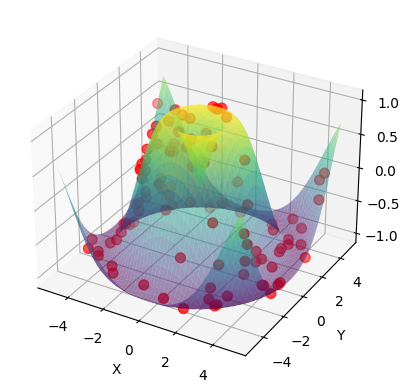

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the mountain surface equation
def mountain_surface(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Generate a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the z values using the mountain surface equation
Z = mountain_surface(X, Y)

# Generate 100 random points on the surface
np.random.seed(0)
points = np.random.choice(X.size, size=100, replace=False)
x_points = X.flat[points]
y_points = Y.flat[points]
z_points = Z.flat[points]

# Create a 3D figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mountain surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Plot the random points on the surface
ax.scatter(x_points, y_points, z_points, color='red', s=50)

# Set labels for the x, y, and z axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

# Randomly identifying obstacles

Interactive plot

In [5]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Making 10% of the randomly generated points as obstacles
obstacle_count = int(0.1 * len(points))

# Select 10% of the points as obstacles
obstacle_indices = np.random.choice(len(points), size=obstacle_count, replace=False)

# Extract the x, y, and z coordinates of the obstacle points
obstacle_x = x_points[obstacle_indices]
obstacle_y = y_points[obstacle_indices]
obstacle_z = z_points[obstacle_indices]

obstacles = [(x, y, z) for x,y,z in zip(obstacle_x, obstacle_y, obstacle_z)]
#print(obstacles)
# Plot the mountain surface and the obstacle points
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.5)])
fig.add_trace(go.Scatter3d(x=obstacle_x, y=obstacle_y, z=obstacle_z, mode='markers', marker=dict(size=8, color='black', opacity=1)))
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

app = Dash(__name__)
app.layout = html.Div([dcc.Graph(figure=fig)])
app.run(mode='external')

[(-1.9696969696969697, -2.070707070707071, 0.27991242431738783), (3.383838383838384, 2.878787878787879, -0.9638597623606822), (2.9797979797979792, -0.6565656565656566, 0.09019567374786519), (-3.686868686868687, -4.292929292929293, -0.5845825261079173), (-2.1717171717171717, -0.7575757575757578, 0.7456651620230641), (-3.080808080808081, -3.1818181818181817, -0.9600913960109118), (0.7575757575757578, -0.15151515151515138, 0.697984208432581), (-4.393939393939394, 0.9595959595959593, -0.9770005848830537), (2.474747474747475, -0.050505050505050164, 0.618105087593196), (-1.5656565656565657, 1.7676767676767673, 0.7034537381368046)]


<IPython.core.display.Javascript object>

Best path:  [25, 28, 56, 85, 37, 76, 35, 49]
Path length:  45.38952890473251


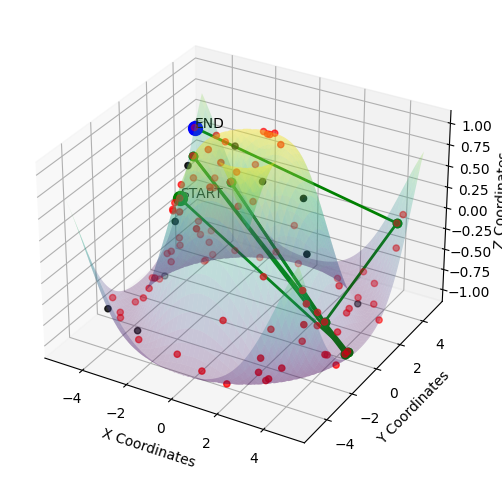

In [8]:
non_obstacle_x = np.delete(x_points, obstacle_indices)
non_obstacle_y = np.delete(y_points, obstacle_indices)
non_obstacle_z = np.delete(z_points, obstacle_indices)

non_obstacles = [(x, y, z) for x, y, z in zip(non_obstacle_x, non_obstacle_y, non_obstacle_z)]
# print(non_obstacles)

start_point_index = np.random.randint(len(non_obstacles))
end_point_index = np.random.randint(len(non_obstacles))

# To make sure start and end vertices are not same
while start_point_index == end_point_index :
  start_point_index = np.random.randint(len(non_obstacles))
  end_point_index = np.random.randint(len(non_obstacles))

# To ignore divide by zero warning
np.seterr(divide='ignore')

ant_colony_optimization(X, Y, Z, non_obstacles, obstacles, start_point_index, end_point_index, n_ants=5, n_iterations=50, alpha=1, beta=1, evaporation_rate=0.5, Q=1)